<function matplotlib.pyplot.show(close=None, block=None)>

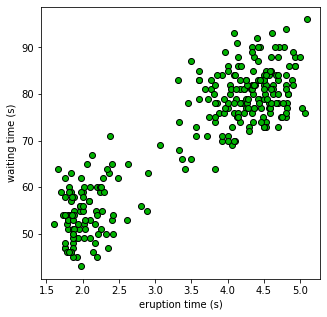

In [1]:
# Tool for a didactic introduction to the K-means algorithm
# Author: Sascha Lill
# Date:   Dec 31 2020

# load libraries, visualize the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("faithful.csv")     #'faithful.csv' ONLY
#df = pd.read_csv("iris.csv")        #'iris.csv' ONLY
X = df.to_numpy()
#X = X[:,0:3]                        #'iris.csv' ONLY
X = X.astype(np.float64)

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0],X[:,1], color = (0,0.7,0), edgecolors = 'k')
plt.xlabel('eruption time (s)')
plt.ylabel('waiting time (s)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

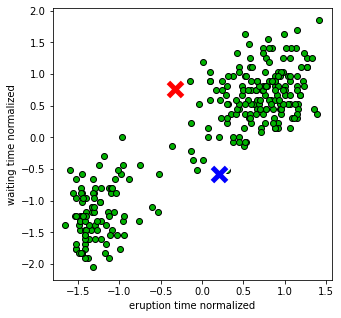

In [16]:
# normalize the data
X_mean = np.mean(X, axis=0)         # mean of columns
X_std  = np.std(X, axis=0)          # standard deviation of columns
X = X - X_mean
X = X/X_std

# initialize the K-means algorithm
maxiter = 1000                      # maximum iteration number
eps = 10**(-3)                      # tolerance for change of J
iter = 1                            # iteration number

N = np.shape(X)[0]                  # N = number of rows in the data set
K = 2                               # K = cluster number
D = np.shape(X)[1]                  # D = number of columns in the data set (Dimension)
r = np.zeros((N,K))                 # (N,K) assignment matrix
rand_col = 0.8*np.random.rand(K,3)  # random coloring

#mu = np.array([[1,-1],[-1,1]])     # (K,D) initial guess for means
mu = np.random.normal(size=(K,D))

# distance evaluation
dist_vect = np.swapaxes(np.array([X,]*K),0,1)  - np.array([mu,]*N) # (N,K,D) distance vectors of point n to mean k
dist_scal = np.linalg.norm(dist_vect, axis = 2)                    # (N,K) distance scalars of point n to mean k


plt.figure(figsize=(5, 5))
plt.scatter(X[:,0],X[:,1], color = (0,0.7,0), edgecolors = 'k')
plt.scatter(mu[0,0],mu[0,1], color = 'w', marker = 'x', s = 300, linewidth=8)
plt.scatter(mu[0,0],mu[0,1], color = 'r', marker = 'x', s = 200, linewidth=5)

if (K == 2):
    plt.scatter(mu[1,0],mu[1,1], color = 'w', marker = 'x', s = 300, linewidth=8)
    plt.scatter(mu[1,0],mu[1,1], color = 'b', marker = 'x', s = 200, linewidth=5)

#colorful plots for more than 2 clusters
if (K > 2):
    for k in range(K):
        plt.scatter(mu[k,0],mu[k,1], color = 'w', marker = 'x', s = 300, linewidth=8)
        plt.scatter(mu[k,0],mu[k,1], color = rand_col[k,:], marker = 'x', s = 200, linewidth=5)



plt.xlabel('eruption time normalized')
plt.ylabel('waiting time normalized')
plt.show

      J =  82.0322949506938 
Delta_J =  55.810688734407904


<function matplotlib.pyplot.show(close=None, block=None)>

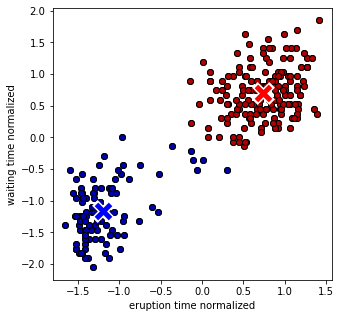

In [18]:
# E-step
argmin_pos = np.argmin(dist_scal, axis = 1)                        # (N) position of the argmin

r = np.zeros((N,K))                                                # (N,K) assignment matrix
for i in np.arange(np.shape(r)[0]):
    r[i,argmin_pos[i]] = 1
cl_size = np.sum(r, axis = 0)                                      # (K) cluster size
J_E = np.sum(r*dist_scal*dist_scal) 



# M-step
weight_tensor = np.swapaxes(np.array([r,]*D),0,2)                  # (K,N,D) weights of all coordinates
cl_size1 = np.maximum(cl_size,1)                                   # avoid division by 0
mu = np.sum(X*weight_tensor, axis = 1) / np.swapaxes(np.array([cl_size1,]*D ),0,1)  # (K,D) new means


# distance evaluation
dist_vect = np.swapaxes(np.array([X,]*K),0,1)  - np.array([mu,]*N) # (N,K,D) distance vectors of point n to mean k
dist_scal = np.linalg.norm(dist_vect, axis = 2)                    # (N,K) distance scalars of point n to mean k
J_M = np.sum(r*dist_scal*dist_scal)                                # distortion
Delta_J = J_E - J_M
print('      J = ',J_M,'\nDelta_J = ',Delta_J)



plt.figure(figsize=(5, 5))
plt.scatter(X[:,0],X[:,1], color = (0,0.7,0), edgecolors = 'k')
plt.scatter(X[argmin_pos == 0,0],X[argmin_pos == 0,1], color = (0.7,0,0), edgecolors = 'k')
plt.scatter(mu[0,0],mu[0,1], color = 'w', marker = 'x', s = 300, linewidth=8)
plt.scatter(mu[0,0],mu[0,1], color = 'r', marker = 'x', s = 200, linewidth=5)

if (K == 2):
    plt.scatter(X[argmin_pos == 1,0],X[argmin_pos == 1,1], color = (0,0,0.7), edgecolors = 'k')
    plt.scatter(mu[1,0],mu[1,1], color = 'w', marker = 'x', s = 300, linewidth=8)
    plt.scatter(mu[1,0],mu[1,1], color = 'b', marker = 'x', s = 200, linewidth=5)

#colorful plots for more than 2 clusters
if (K > 2):
    for k in range(K):
        plt.scatter(X[argmin_pos == k,0],X[argmin_pos == k,1], color = rand_col[k,:], edgecolors = 'k')
        plt.scatter(mu[k,0],mu[k,1], color = 'w', marker = 'x', s = 300, linewidth=8)
        plt.scatter(mu[k,0],mu[k,1], color = rand_col[k,:], marker = 'x', s = 200, linewidth=5)

plt.xlabel('eruption time normalized')
plt.ylabel('waiting time normalized')
plt.show

In [19]:
# Area for testing code - and safety margin

#a = np.swapaxes(np.array([[0,1],[1,0],[1,1]]),0,1)
#b = np.array([2,2])

#print(np.linalg.norm(b) )

<function matplotlib.pyplot.show(close=None, block=None)>

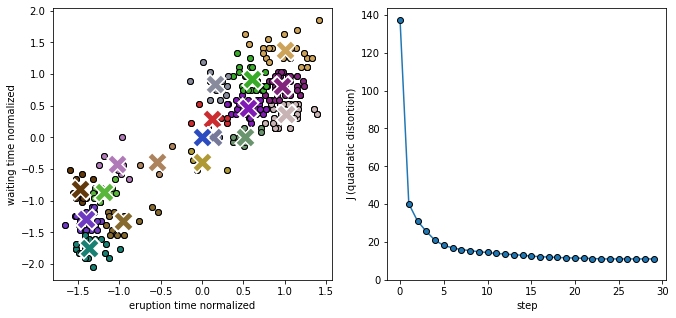

In [11]:
#The complete K-means-algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K = 20                             # K = cluster number
maxiter = 100                     # maximum iteration number
epsilon = 10**(-3)                # epsilon = tolerance for change of J
Delta_J = epsilon + 1             # change of J, is initially larger than epsilon
iter = 1                          # iteration number

def normalize(X):
    X_mean = np.mean(X, axis= 0)  # mean of columns
    X_std  = np.std(X,axis = 0)   # standard deviation of columns
    X = X - X_mean
    X = X/X_std
    return(X)


def K_initialize(X):
    N = np.shape(X)[0]                                          # N = number of rows in the data set
    D = np.shape(X)[1]                                          # D = number of columns in the data set (Dimension)
    r = np.zeros((N,K))                                         # (N,K) assignment matrix
    mu = np.random.normal(size=(K,D))                           # (K,D) initial guess for means
    #mu = np.array([[1,-1],[-1,1]])                             # (K,D) fixed initial guess (for demo only)
    dv = np.swapaxes(np.array([X,]*K),0,1)  - np.array([mu,]*N) # (N,K,D) distance vectors of point n to mean k
    ds = np.linalg.norm(dv, axis = 2)                           # (N,K) distance scalars of point n to mean k
    J = np.array([])                                            # distortion vector
    return(X,N,D,r,mu,dv,ds,J)


def K_step(X,N,D,r,mu,dv,ds,J):
    # E-step
    argmin_pos = np.argmin(ds, axis = 1)                        # (N) position of the argmin

    r = np.zeros((N,K))                                         # (N,K) assignment matrix
    for i in np.arange(np.shape(r)[0]):
        r[i,argmin_pos[i]] = 1
    cl_size = np.sum(r, axis = 0)                               # (K) cluster size
    J = np.append(J,np.sum(r*ds*ds))

    # M-step
    weight_tensor = np.swapaxes(np.array([r,]*D),0,2)           # (K,N,D) weights of all coordinates
    cl_size1 = np.maximum(cl_size,1)                            # avoid division by 0
    mu = np.sum(X*weight_tensor, axis = 1) / np.swapaxes(np.array([cl_size1,]*D ),0,1)  # (K,D) new means

    # distance evaluation
    dv = np.swapaxes(np.array([X,]*K),0,1)  - np.array([mu,]*N) # (N,K,D) distance vectors of point n to mean k
    ds = np.linalg.norm(dv, axis = 2)                           # (N,K) distance scalars of point n to mean k
    J = np.append(J,np.sum(r*ds*ds))                            # distortion
    Delta_J = J[-2] - J[-1]
    return(r,mu,dv,ds,J,Delta_J,argmin_pos)



#MAIN function
df = pd.read_csv("faithful.csv")     #'faithful.csv' ONLY
#df = pd.read_csv("iris.csv")        #'iris.csv' ONLY
X = df.to_numpy()
#X = X[:,0:3]                        #'iris.csv' ONLY
X = X.astype(np.float64)

X = normalize(X)

(X,N,D,r,mu,dv,ds,J) = K_initialize(X)

while (Delta_J > epsilon) and (iter < maxiter):
    (r,mu,dv,ds,J,Delta_J,argmin_pos) = K_step(X,N,D,r,mu,dv,ds,J)
    iter += 1


    
#Plotting the results
fig,ax = plt.subplots(1,2,figsize=(11,5))
ax[0].scatter(X[:,0],X[:,1], color = (0,0.7,0), edgecolor = 'k')                             # green only
ax[0].scatter(X[argmin_pos == 0,0],X[argmin_pos == 0,1], color = (0.7,0,0), edgecolors = 'k') # red-blue
ax[0].scatter(mu[0,0],mu[0,1], color = 'w', marker = 'x', s = 300, linewidth=8)
ax[0].scatter(mu[0,0],mu[0,1], color = 'r', marker = 'x', s = 200, linewidth=5)
if (K == 2):
    ax[0].scatter(X[argmin_pos == 1,0],X[argmin_pos == 1,1], color = (0,0,0.7), edgecolors = 'k')
    ax[0].scatter(mu[1,0],mu[1,1], color = 'w', marker = 'x', s = 300, linewidth=8)
    ax[0].scatter(mu[1,0],mu[1,1], color = 'b', marker = 'x', s = 200, linewidth=5)

#colorful plots for more than 2 clusters
if (K > 2):
    for k in range(K):
        rand_col = 0.8*np.random.rand(3)
        ax[0].scatter(X[argmin_pos == k,0],X[argmin_pos == k,1], color = rand_col, edgecolors = 'k')
        ax[0].scatter(mu[k,0],mu[k,1], color = 'w', marker = 'x', s = 300, linewidth=8)
        ax[0].scatter(mu[k,0],mu[k,1], color = rand_col, marker = 'x', s = 200, linewidth=5)

ax[0].set_xlabel('eruption time normalized')
ax[0].set_ylabel('waiting time normalized')
#ax[1].plot(np.arange(np.size(J)),[J[-1],]*np.size(J), color = (0.5,0.5,0.5))
ax[1].plot(np.arange(np.size(J)),J, marker = 'o', mec = 'k')
ax[1].set_xlabel('step')
ax[1].set_ylabel('J (quadratic distortion)')
ax[1].set_ylim(ymin = 0)

plt.show